In [1]:
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from transformers import pipeline

In [2]:
website = 'https://www.bbc.co.uk/news/business-68230697'
data = requests.get(website)
data

<Response [200]>

In [3]:
data.content

b'<!DOCTYPE html><html lang="en-GB" class="no-js"><head><meta charSet="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1" /><title data-rh="true">Why firms are racing to produce green ammonia - BBC News</title><meta data-rh="true" name="description" content="Ammonia is essential for fertiliser production but producing it is carbon intensive."/><meta data-rh="true" name="theme-color" content="#FFFFFF"/><meta data-rh="true" property="article:author" content="https://www.facebook.com/bbcnews"/><meta data-rh="true" property="fb:admins" content="100004154058350"/><meta data-rh="true" property="fb:app_id" content="1609039196070050"/><meta data-rh="true" property="og:description" content="Ammonia is essential for fertiliser production but producing it is carbon intensive."/><meta data-rh="true" property="og:image" content="https://ichef.bbci.co.uk/news/1024/branded_news/16471/production/_132594219_gettyimages-1224184200.jpg"/><meta data-rh="true" property="og:image:a

In [6]:
soup = BeautifulSoup(data.content)
soup

<!DOCTYPE html>
<html class="no-js" lang="en-GB"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title data-rh="true">Why firms are racing to produce green ammonia - BBC News</title><meta content="Ammonia is essential for fertiliser production but producing it is carbon intensive." data-rh="true" name="description"/><meta content="#FFFFFF" data-rh="true" name="theme-color"/><meta content="https://www.facebook.com/bbcnews" data-rh="true" property="article:author"/><meta content="100004154058350" data-rh="true" property="fb:admins"/><meta content="1609039196070050" data-rh="true" property="fb:app_id"/><meta content="Ammonia is essential for fertiliser production but producing it is carbon intensive." data-rh="true" property="og:description"/><meta content="https://ichef.bbci.co.uk/news/1024/branded_news/16471/production/_132594219_gettyimages-1224184200.jpg" data-rh="true" property="og:image"/><meta content="Tractor working on a field" d

In [7]:
text_blocks = soup.find_all("div", attrs={"data-component": "text-block"})
text_blocks

[<div class="ssrcss-uf6wea-RichTextComponentWrapper ep2nwvo0" data-component="text-block"><div class="ssrcss-7uxr49-RichTextContainer e5tfeyi1"><p class="ssrcss-1q0x1qg-Paragraph e1jhz7w10"><b class="ssrcss-1xjjfut-BoldText e5tfeyi3">In the 19th Century, Europeans realised what the Inca had known long before. Bird droppings, or guano, made a fantastic fertiliser. </b></p></div></div>,
 <div class="ssrcss-uf6wea-RichTextComponentWrapper ep2nwvo0" data-component="text-block"><div class="ssrcss-7uxr49-RichTextContainer e5tfeyi1"><p class="ssrcss-1q0x1qg-Paragraph e1jhz7w10">And so sprang up <a class="ssrcss-f6h2dj-InlineLink e1kn3p7n0" href="https://www.atlasobscura.com/articles/when-the-western-world-ran-on-guano">a gigantic industry</a> dedicated to the harvesting of guano from Latin American bird colonies, where there were huge piles of the stuff.</p></div></div>,
 <div class="ssrcss-uf6wea-RichTextComponentWrapper ep2nwvo0" data-component="text-block"><div class="ssrcss-7uxr49-RichTex

In [8]:
for item in text_blocks:
  print(item.text)

In the 19th Century, Europeans realised what the Inca had known long before. Bird droppings, or guano, made a fantastic fertiliser. 
And so sprang up a gigantic industry dedicated to the harvesting of guano from Latin American bird colonies, where there were huge piles of the stuff.
It was so rich in ammonia, the key ingredient, that a mere whiff could induce coughing and sneezing. Not exactly a pleasant cargo to ferry across the world. 
As demand for fertiliser rose in the early 1900s, someone began to think, "Perhaps there's another way?" That someone was Fritz Haber, a German chemist who, along with Carl Bosch, developed the Haber-Bosch process for synthesising ammonia. 
We have relied on that technology for more than 100 years. Without it, the world's population might be just half of what it is today - so vital is ammonia fertiliser for growing food.
But yet again, someone is asking whether we should do things differently because the Haber-Bosch process, when powered by fossil fuel

In [9]:
# Process data for sentiment analyser:
text_list = [item.text for item in text_blocks]

# Pass in data to sentiment analyser:
sentiment_analyser = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")
sentiments = sentiment_analyser(text_list)

# Take a look at the sentiments:
sentiments

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

[{'label': 'POS', 'score': 0.9588198065757751},
 {'label': 'NEU', 'score': 0.8157554864883423},
 {'label': 'NEG', 'score': 0.9419685006141663},
 {'label': 'POS', 'score': 0.5381786823272705},
 {'label': 'POS', 'score': 0.813274621963501},
 {'label': 'NEG', 'score': 0.9267898201942444},
 {'label': 'NEU', 'score': 0.813296914100647},
 {'label': 'NEU', 'score': 0.5330656170845032},
 {'label': 'NEU', 'score': 0.9056081175804138},
 {'label': 'NEU', 'score': 0.9527980089187622},
 {'label': 'NEU', 'score': 0.9060183167457581},
 {'label': 'POS', 'score': 0.5223575830459595},
 {'label': 'POS', 'score': 0.7621167302131653},
 {'label': 'NEU', 'score': 0.6282902956008911},
 {'label': 'POS', 'score': 0.6456964015960693},
 {'label': 'NEU', 'score': 0.6552992463111877},
 {'label': 'NEU', 'score': 0.8141528964042664},
 {'label': 'NEU', 'score': 0.8489581346511841},
 {'label': 'NEU', 'score': 0.9163295030593872},
 {'label': 'NEU', 'score': 0.6917467713356018},
 {'label': 'POS', 'score': 0.5899714231491

In [10]:
# Create sentiment dictionary:
sentiment_dictionary = {}
i = 1
for text, sentiment in zip(text_list, sentiments):
  sentiment_dictionary[f"block {i}"] = {
      "text": text,
      "sentiment_label": sentiment["label"],
      "sentiment_score": sentiment["score"]
                                }
  i += 1

# Place the sentiment_dictionary into a DataFrame
df = pd.DataFrame(data=sentiment_dictionary)
df

block 1  \
text             In the 19th Century, Europeans realised what t...   
sentiment_label                                                POS   
sentiment_score                                            0.95882   

                                                           block 2  \
text             And so sprang up a gigantic industry dedicated...   
sentiment_label                                                NEU   
sentiment_score                                           0.815755   

                                                           block 3  \
text             It was so rich in ammonia, the key ingredient,...   
sentiment_label                                                NEG   
sentiment_score                                           0.941969   

                                                           block 4  \
text             As demand for fertiliser rose in the early 190...   
sentiment_label                                                POS   
sentiment_score                                           0.538179   

                                                           block 5  \
text             We have relied on that technology for more tha...   
sentiment_label                                                POS   
sentiment_score                                           0.813275   

                                                           block 6  \
text             But yet again, someone is asking whether we sh...   
sentiment_label                                                NEG   
sentiment_score                                            0.92679   

                                                           block 7  \
text             Ammonia production currently accounts for near...   
sentiment_label                                                NEU   
sentiment_score                                           0.813297   

                                                           block 8  \
text             "We have a well-sealed system, you don't smell...   
sentiment_label                                                NEU   
sentiment_score                                           0.533066   

                                                           block 9  \
text             Ammonia, or NH3, is nothing more than nitrogen...   
sentiment_label                                                NEU   
sentiment_score                                           0.905608   

                                                          block 10  ...  \
text             The ingredients flow through a honeycomb struc...  ...   
sentiment_label                                                NEU  ...   
sentiment_score                                           0.952798  ...   

                                                          block 20  \
text             Within the next 12-18 months, Jupiter Ionics a...   
sentiment_label                                                NEU   
sentiment_score                                           0.691747   

                                                          block 21  \
text             As Prof Winter notes, it's the successful scal...   
sentiment_label                                                POS   
sentiment_score                                           0.589971   

                                                          block 22  \
text             There are other options. As Josh McEnaney, pre...   
sentiment_label                                                NEU   
sentiment_score                                           0.887792   

                                                          block 23  \
text             His company is developing a system that uses s...   
sentiment_label                                                POS   
sentiment_score                                           0.757642   

                                                          block 24  \
text             "We don't require 

In [11]:
df = df.T
df

text sentiment_label  \
block 1   In the 19th Century, Europeans realised what t...             POS   
block 2   And so sprang up a gigantic industry dedicated...             NEU   
block 3   It was so rich in ammonia, the key ingredient,...             NEG   
block 4   As demand for fertiliser rose in the early 190...             POS   
block 5   We have relied on that technology for more tha...             POS   
block 6   But yet again, someone is asking whether we sh...             NEG   
block 7   Ammonia production currently accounts for near...             NEU   
block 8   "We have a well-sealed system, you don't smell...             NEU   
block 9   Ammonia, or NH3, is nothing more than nitrogen...             NEU   
block 10  The ingredients flow through a honeycomb struc...             NEU   
block 11  Crucially, the whole thing can, says Mr Beach,...             NEU   
block 12  Once started, the system can cycle on and off ...             POS   
block 13  In general, green ammonia start-ups want to sh...             POS   
block 14  "We do want to make fertiliser on a small scal...             NEU   
block 15  Another firm, Atmonia in Iceland, also wants t...             POS   
block 16  Douglas MacFarlane at Monash University in Aus...             NEU   
block 17                        More technology of business             NEU   
block 18  Jupiter Ionics is currently planning to build ...             NEU   
block 19  Jupiter Ionics' technology differs from Starfi...             NEU   
block 20  Within the next 12-18 months, Jupiter Ionics a...             NEU   
block 21  As Prof Winter notes, it's the successful scal...             POS   
block 22  There are other options. As Josh McEnaney, pre...             NEU   
block 23  His company is developing a system that uses s...             POS   
block 24  "We don't require any hydrogen production," sa...             NEU   
block 25  Bill David at the University of Oxford points ...             NEU   
block 26  He praises large projects for manufacturing am...             POS   
block 27  While ammonia can be used as a fuel, it can al...             NEU   
block 28  "We're seeing real progress in [the] developme...             POS   
block 29        It's all a far cry from bird poo, isn't it?             NEU   

         sentiment_score  
block 1          0.95882  
block 2         0.815755  
block 3         0.941969  
block 4         0.538179  
block 5         0.813275  
block 6          0.92679  
block 7         0.813297  
block 8         0.533066  
block 9         0.905608  
block 10        0.952798  
block 11        0.906018  
block 12        0.522358  
block 13        0.762117  
block 14         0.62829  
block 15        0.645696  
block 16        0.655299  
block 17        0.814153  
block 18        0.848958  
block 19         0.91633  
block 20        0.691747  
block 21        0.589971  
block 22        0.887792  
block 23        0.757642  
block 24        0.872087  
block 25        0.736553  
block 26        0.654154  
block 27        0.918158  
block 28         0.84924  
block 29        0.711812

In [12]:
# Create second dataframe with sentiment_labels and their counts
df2 = pd.DataFrame(df["sentiment_label"].value_counts())

# Reset column names and rename
df2 = df2.reset_index()
df2.columns = ['sentiment', 'count']
df2

sentiment  count
0       NEU     17
1       POS     10
2       NEG      2

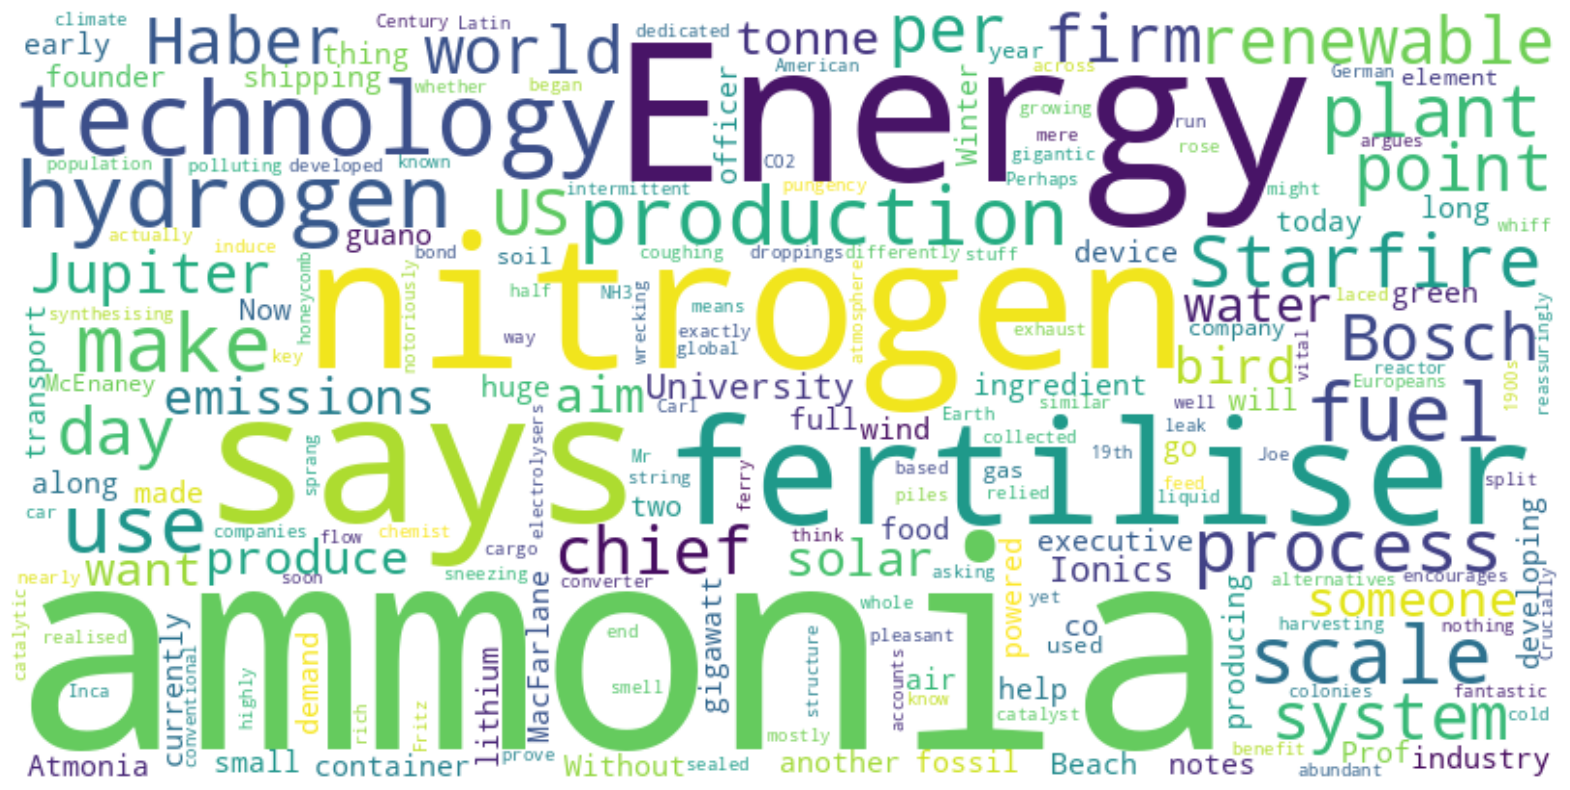

In [13]:
# Alter these to change the size of the word cloud
figsize_height = 20
figsize_width = 10

# Join all text into a single string:
text_string = " ".join([item.text for item in text_blocks])

# Pass it into WordCloud:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=800, height=400).generate(text_string)

# Create visualisation parameters:
plt.figure(figsize=(figsize_height,figsize_width))
plt.imshow(word_cloud,
           interpolation='bilinear',
           aspect="auto")
plt.axis("off")

# Visualise!
plt.show()

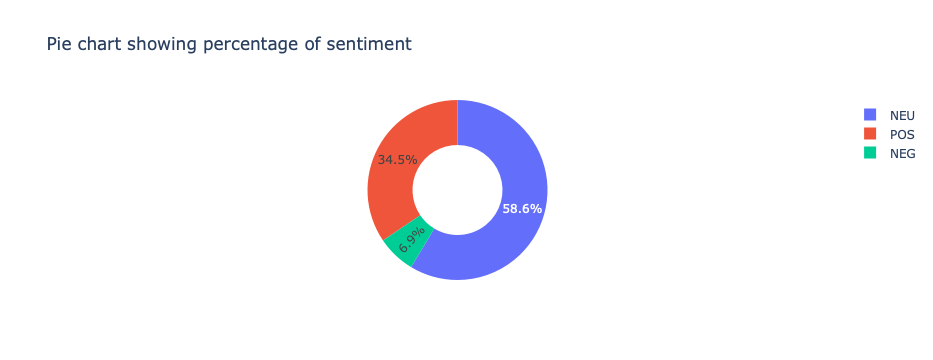

In [14]:
# Configure colours
positive = "#777ae4"
negative =  "#ee9247"
neutral = "#e6e7f8"

# Compile pie chart
chart = px.pie(df2,
            hole =.5,
            values='count',
            names='sentiment',
            color_discrete_map={
                "POS": positive,
                "NEG": negative,
                "NEU": neutral
            },
            title='Pie chart showing percentage of sentiment')
chart